<a href="https://colab.research.google.com/github/tiara567/Vehicle-Detection/blob/main/Image_Classification_Edited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare Environment
- check pyhton version (it should be python3) (Python 2 is no longer supported in Colab) (Python 3.7.12)
- install tensorflow 2.7 (updated version) (Already installed 2.7.0)



In [1]:
import sys
print(sys.version)

3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]


In [2]:
import tensorflow as tf
print(tf.__version__)

2.7.0


# Build Image Classifier Algorithm using CNN


1. Load downloaded kaggle dataset from drive (Vehicle and non-vehicles) 
2. Data preporocessing
3. CNN modelling





### Step 1: Load Downloaded Kaggle Dataset from Gdrive
1. Download file from kaggle, reduce the number of images (500/class). then , upload to the Gdrive
https://www.kaggle.com/brsdincer/vehicle-detection-image-set
2. Mount GDrive to google colab
3. Locate the dataset file (dataset_BBG2) in google drive (DATADIR = data direction)
*   https://towardsdatascience.com/google-colab-import-and-export-datasets-eccf801e2971
*   https://www.youtube.com/watch?v=UfIQon2fAh8


In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
DATADIR = "drive/My Drive/dataset_BBG2"

### Step 2: Data pre-processing
1. BGR to RGB
2. Re-size 64 X 64
3. Converts to array
4. re-scale array to 0-1
4. Save it as pickles (Feature and label)


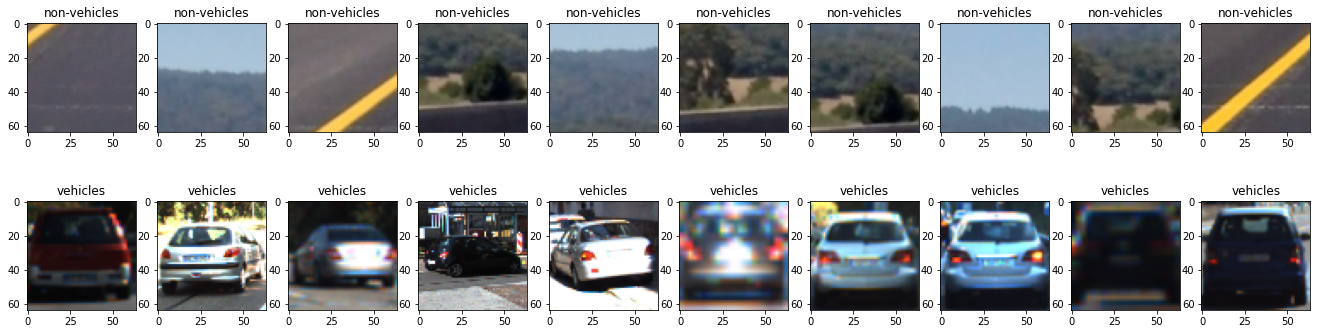

In [5]:
# working with array
import numpy as np

# data visualization (plot, graph, show the image)
import matplotlib.pyplot as plt

# operation system (interact with the file system)
import os

# image or video analysis
import cv2

# define the classes or categories
CATEGORIES = ["non-vehicles", "vehicles"]

# load the dataset

i = 0
plt.figure(figsize=(23, 6))
for category in CATEGORIES:

    # path to dataset directory
    # define full path of the dataset
    path = os.path.join(DATADIR, category)

    for img in os.listdir(path)[:10]:

        # note : dataset read as BGR
        img_array_bgr = cv2.imread(os.path.join(path, img))

        # convert dataset from BGR to RGB
        img_rgb = cv2.cvtColor(img_array_bgr, cv2.COLOR_BGR2RGB)

        # visualize the dataset in form of image
        ax = plt.subplot(2, 10, i + 1)
        plt.imshow(img_rgb)
        plt.title(category)

        i += 1

plt.show()

(64, 64, 3) uint8
(64, 64, 3)


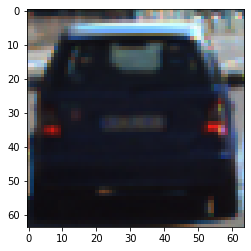

In [6]:
# observe the dimension and type of laod image
print(img_rgb.shape, img_rgb.dtype)

# resize image to 64 X 64 pixel
IMG_SIZE = 64
new_array = cv2.resize(img_rgb, (IMG_SIZE, IMG_SIZE))

# observe the dimension of load image after resize
print(new_array.shape)

# visualize the load image after resized and converted in form of image
plt.imshow(new_array)
plt.show()

In [7]:
# create training data
# label 0 for non-vehicles and 1 for vehicles


def create_training_data(CATEGORIES, DATADIR, IMG_SIZE=64):
    training_data = []
    for category in CATEGORIES:

        # path to data set directory
        path = os.path.join(DATADIR, category)

        # label as 0 and 1 instead of vehicles and non-vehicles
        class_num = CATEGORIES.index(category)

        for img in os.listdir(path):
            try:

                # read image as BGR
                img_array_bgr = cv2.imread(os.path.join(path, img))

                # convert to RGB
                img_rgb = cv2.cvtColor(img_array_bgr, cv2.COLOR_BGR2RGB)

                # resize into 300 x 300
                new_array = cv2.resize(img_rgb, (IMG_SIZE, IMG_SIZE))

                # store image array into training_data
                training_data.append([new_array, class_num])

            except Exception as e:
                pass

    return training_data

In [10]:
# the number of image is trained
# training data tensor shape [samples, (dimension = width, length, dept), label]
training_data = create_training_data(CATEGORIES, DATADIR, IMG_SIZE=64)
print(len(training_data))

1000


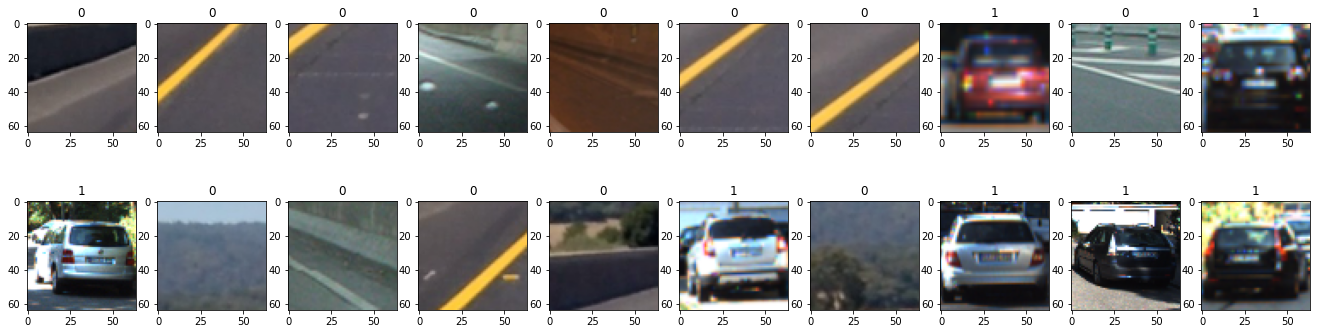

In [11]:
# balance the data set
# shuffle the data set (position of vehicles and non-vehicles bacomes random)
import random

random.shuffle(training_data)

i = 0
plt.figure(figsize=(23, 6))

#observe the load image after shuuffled
for sample in training_data[:20]:
    # print(sample[1])

    # visualize the dataset in form of image
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(sample[0])
    plt.title(sample[1])

    i += 1

plt.show()

In [12]:
# Process the array of images to feature set
# Process the label as 0 and 1

# feature set
X = []

# label set
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

IMG_SIZE = 64

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

# # Re-scale the pixel intensity to the range of 0 and 1
X = np.array(X / 255.0)
y = np.array(y)

In [13]:
# build the file of image's array that will being extracted (feature extraction)
# build the file of label

import pickle

# features
pickle_out = open("drive/My Drive/X.pickles_BBG2","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

# labels
pickle_out = open("drive/My Drive/y.pickles_BBG2","wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [14]:
import pickle

X = pickle.load(open("drive/My Drive/X.pickles_BBG2","rb"))
y = pickle.load(open("drive/My Drive/y.pickles_BBG2","rb"))

In [15]:
# visualize what is inside the file of image's array
X.shape

(1000, 64, 64, 3)

In [16]:
y.shape

(1000,)

## Step 3: Modelling CNN Image Classifier


*   Mounted to gdrive
*   Read file contains feature "X.pickles_BBG2" (array of images) and label "y.pickles2_BBG2" (array of label)
*   Split dataset
*   CNN model
*   Train Model
*   Graphing for Evaluation
*   Tunning
*   Save final model as (VehicleDetection.h5)

Note : CNN Model failed to predict data correctly. It predicts everything as 0 "Non-Vehicle"


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import layers, regularizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [18]:
# Split the data into training and testing set
Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                y,
                                                train_size=0.9,
                                                test_size=0.1,
                                                stratify=y,
                                                random_state=42)

# Split the training set into train and val
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain,
                                              ytrain,
                                              train_size=0.8,
                                              test_size=0.2,
                                              stratify=ytrain,
                                              random_state=42)

In [19]:
# observe the distribution of dataset
print('Train Data', Xtrain.shape)
print('Validation Data', Xval.shape)
print('Test Data', Xtest.shape)

Train Data (720, 64, 64, 3)
Validation Data (180, 64, 64, 3)
Test Data (100, 64, 64, 3)


In [20]:
# observe the distribution of dataset
print('Train Data', ytrain.shape)
print('Validation Data', yval.shape)
print('Test Data', ytest.shape)

Train Data (720,)
Validation Data (180,)
Test Data (100,)


In [21]:
# Feature extraction process
model = Sequential()

# first set of CONV => RELU => POOL layers
model.add(Conv2D(
          filters=32,
          kernel_size=(3, 3),
          padding='same',
          input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# second set of CONV => RELU => POOL layers
model.add(Conv2D(
          filters=32,
          kernel_size=(3, 3),
          padding='same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# DNN Part for classification flatten layer => fully-connected layer => activation layer

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
#loss, optimizer,meterics
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 activation (Activation)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                    

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("vehicle.h5",
                             monitor="val_accuracy",
                             save_best_only=True,
                             mode='auto',
                             verbose=1)

earlystop = EarlyStopping(monitor="val_accuracy",
                          patience=5,
                          mode='auto',
                          verbose=1)

reducelr = ReduceLROnPlateau(monitor="val_accuracy",
                             factor=0.3,
                             patience=3,
                             min_delta=0.001,
                             mode='auto',
                             verbose=1)

In [24]:
#trained the model using 10 interartion
H = model.fit(Xtrain,
              ytrain,
              epochs=7,
              batch_size=32,
              validation_data=(Xval, yval),
              verbose=1,
              callbacks=[checkpoint, earlystop, reducelr])

Epoch 1/7
23/23 [==============================] - ETA: 0s - loss: 0.3847 - accuracy: 0.8222
Epoch 00001: val_accuracy improved from -inf to 0.90000, saving model to vehicle.h5
23/23 [==============================] - 5s 178ms/step - loss: 0.3847 - accuracy: 0.8222 - val_loss: 0.2360 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 2/7
23/23 [==============================] - ETA: 0s - loss: 0.1059 - accuracy: 0.9528
Epoch 00002: val_accuracy improved from 0.90000 to 0.98889, saving model to vehicle.h5
23/23 [==============================] - 4s 169ms/step - loss: 0.1059 - accuracy: 0.9528 - val_loss: 0.0477 - val_accuracy: 0.9889 - lr: 0.0010
Epoch 3/7
23/23 [==============================] - ETA: 0s - loss: 0.0705 - accuracy: 0.9750
Epoch 00003: val_accuracy did not improve from 0.98889
23/23 [==============================] - 4s 166ms/step - loss: 0.0705 - accuracy: 0.9750 - val_loss: 0.0565 - val_accuracy: 0.9889 - lr: 0.0010
Epoch 4/7
23/23 [==============================] - ETA: 0s - lo

In [25]:
len(H.history)

5

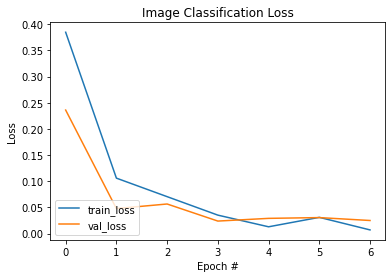

In [26]:
# plotting and examine the data wheteher it is fit, overfit, underfit
N = len(H.history["loss"])
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.title("Image Classification Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")

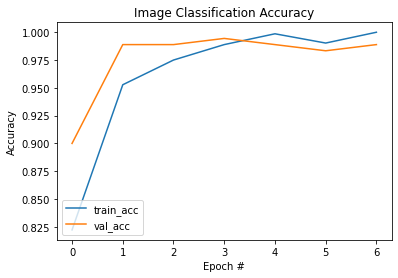

In [27]:
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Image Classification Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")

In [28]:
model.evaluate(Xtest, ytest)

4/4 [==============================] - 0s 35ms/step - loss: 0.0212 - accuracy: 0.9800


[0.021217182278633118, 0.9800000190734863]

In [29]:
y_pred = model.predict(Xtest)
y_pred = np.round(y_pred)
y_pred[:10]

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [30]:
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.96      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



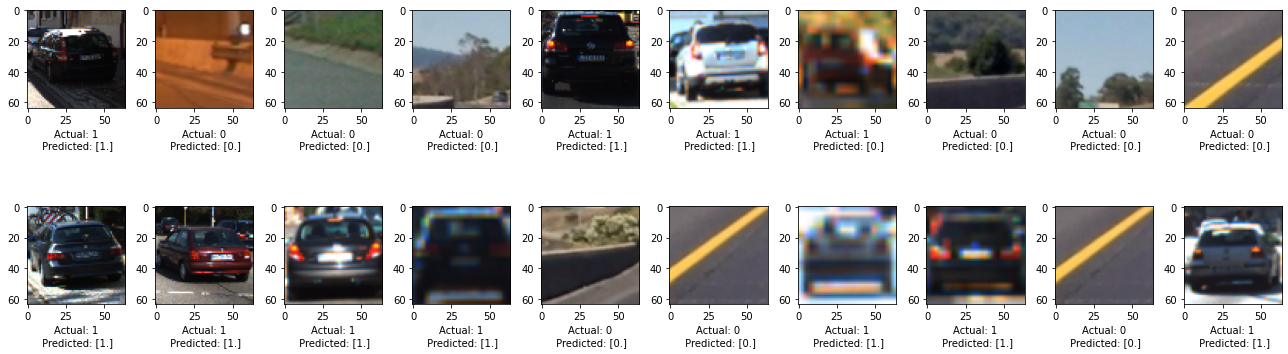

In [31]:
plt.figure(figsize=(18, 6))

for i in range(20):
    sample_idx = np.random.choice(range(len(Xtest)))
    plt.subplot(2, 10, i + 1)
    plt.imshow(Xtest[sample_idx])
    plt.xlabel(
        f"Actual: {ytest[sample_idx]}\n Predicted: {y_pred[sample_idx]}")

plt.tight_layout()
plt.show()

In [32]:
#save the model in the form of .h5
model.save('drive/My Drive/ImageClassificationEdited.h5')

# Turn Image Classifier into Object Detector


1. Input Image 
2. Construct Image Pyramid
3. Run sliding window at each scale of image pyramid
  *   Each step of sliding window, extract ROI
  *   Take ROI and passit to CNN image classifier
  *   Set minimum probability, it it is passed record (class, label, box location
4. Apply Class wise NMS
5. Return Result